In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
countries = [" United-States", " Cambodia", " England", " Puerto-Rico", " Canada", " Germany", " Outlying-US(Guam-USVI-etc)", " India", " Japan", " Greece", " South", " China", " Cuba", " Iran", " Honduras", " Philippines", " Italy", " Poland", " Jamaica", " Vietnam", " Mexico", " Portugal", " Ireland", " France", " Dominican-Republic", " Laos", " Ecuador", " Taiwan", " Haiti", " Columbia", " Hungary", " Guatemala", " Nicaragua", " Scotland", " Thailand", " Yugoslavia", " El-Salvador", " Trinadad&Tobago", " Peru", " Hong", " Holand-Netherlands"]

#### Read data and divide in X and y

In [3]:
names = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "HoursPerWeek", "NativeCountry", "Salary"]

df = pd.read_csv("data/adult/adult.data", names = names)
df_test = pd.read_csv("data/adult/adult_test.test", names = names)
df_test = df_test.iloc[1:] # first row is not data

df_test.head(3)

Age   Workclass    Fnlwgt    Education  Education-num       Marital-status  \
1  25     Private  226802.0         11th            7.0        Never-married   
2  38     Private   89814.0      HS-grad            9.0   Married-civ-spouse   
3  28   Local-gov  336951.0   Assoc-acdm           12.0   Married-civ-spouse   

           Occupation Relationship    Race    Sex  Capital-gain  Capital-loss  \
1   Machine-op-inspct    Own-child   Black   Male           0.0           0.0   
2     Farming-fishing      Husband   White   Male           0.0           0.0   
3     Protective-serv      Husband   White   Male           0.0           0.0   

   HoursPerWeek   NativeCountry   Salary  
1          40.0   United-States   <=50K.  
2          50.0   United-States   <=50K.  
3          40.0   United-States    >50K.

#### Look for any missing data - either NaN or ? as mentionned in data description

In [4]:
df = df.replace(" ?", np.nan)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
HoursPerWeek         0
NativeCountry      583
Salary               0
dtype: int64

In [5]:
df_test = df_test.replace(" ?", np.nan)
df_test.isnull().sum()

Age                 0
Workclass         963
Fnlwgt              0
Education           0
Education-num       0
Marital-status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
HoursPerWeek        0
NativeCountry     274
Salary              0
dtype: int64

#### Drop those rows

In [6]:
df = df.dropna()
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
HoursPerWeek      0
NativeCountry     0
Salary            0
dtype: int64

In [7]:
df_test = df_test.dropna()
df_test.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
HoursPerWeek      0
NativeCountry     0
Salary            0
dtype: int64

#### Divide into X and y

In [8]:
X_train = df.drop(columns = "Salary")
y_train = df["Salary"]
X_test = df_test.drop(columns = "Salary")
y_test = df_test["Salary"]

#### Transform <= 50K to 0 and > 50k to 1

In [9]:
y_train.loc[y_train == " >50K"] = 1
y_train.loc[y_train == " <=50K"] = 0
y_test.loc[y_test == " >50K."] = 1
y_test.loc[y_test == " <=50K."] = 0

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
X_train.describe()

Age        Fnlwgt  Education-num  Capital-gain  Capital-loss  \
count  30163.000000  3.016300e+04   30163.000000  30163.000000  30163.000000   
mean      38.438352  1.897971e+05      10.121274   1092.469748     88.369559   
std       13.134679  1.056527e+05       2.549961   7406.658142    404.291989   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176275e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784290e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376380e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       HoursPerWeek  
count  30163.000000  
mean      40.931207  
std       11.979787  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

#### We can see that the std for column 10 (capital gain) and 11 (capital loss) is way bigger than the mean which might indicate that there is a problem with the data, let's analyze by creating a graph to see if those 2 features correlate with the classification problem

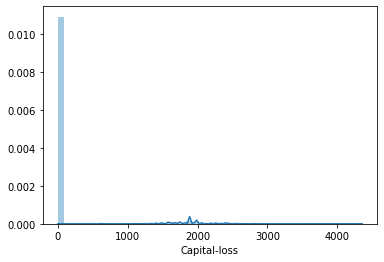

In [11]:
sns.distplot(X_train["Capital-loss"])

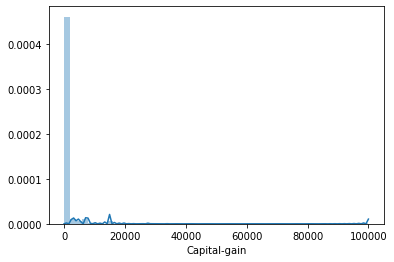

In [12]:
sns.distplot(X_train["Capital-gain"])

#### As we can see the distribution plot for both capital-gain and capital-loss is extremely skewed to the left, lets drop those columns from our feature set

In [13]:
X_train = X_train.drop(columns = "Capital-loss")
X_train = X_train.drop(columns = "Capital-gain")

X_test = X_test.drop(columns = "Capital-loss")
X_test = X_test.drop(columns = "Capital-gain")

# NEED TO NORMALIZE THIS COLUMNS WITH VALUES 0-1


X_train.describe()

Age        Fnlwgt  Education-num  HoursPerWeek
count  30163.000000  3.016300e+04   30163.000000  30163.000000
mean      38.438352  1.897971e+05      10.121274     40.931207
std       13.134679  1.056527e+05       2.549961     11.979787
min       17.000000  1.376900e+04       1.000000      1.000000
25%       28.000000  1.176275e+05       9.000000     40.000000
50%       37.000000  1.784290e+05      10.000000     40.000000
75%       47.000000  2.376380e+05      13.000000     45.000000
max       90.000000  1.484705e+06      16.000000     99.000000

### Normalizing numerical values to have a value between 0 and 1

In [14]:
X_train["Age"] = X_train["Age"].astype(int)
X_test["Age"] = X_test["Age"].astype(int)

X_train["Age"] = (X_train["Age"] - X_train["Age"].min()) / (X_train["Age"].max() - X_train["Age"].min())
X_test["Age"] = (X_test["Age"] - X_test["Age"].min()) / (X_test["Age"].max() - X_test["Age"].min())

X_train["Fnlwgt"] = (X_train["Fnlwgt"] - X_train["Fnlwgt"].min()) / (X_train["Fnlwgt"].max() - X_train["Fnlwgt"].min())
X_test["Fnlwgt"] = (X_test["Fnlwgt"] - X_test["Fnlwgt"].min()) / (X_test["Fnlwgt"].max() - X_test["Fnlwgt"].min())

X_train["Education-num"] = (X_train["Education-num"] - X_train["Education-num"].min()) / (X_train["Education-num"].max() - X_train["Education-num"].min())
X_test["Education-num"] = (X_test["Education-num"] - X_test["Education-num"].min()) / (X_test["Education-num"].max() - X_test["Education-num"].min())

X_train["HoursPerWeek"] = (X_train["HoursPerWeek"] - X_train["HoursPerWeek"].min()) / (X_train["HoursPerWeek"].max() - X_train["HoursPerWeek"].min())
X_test["HoursPerWeek"] = (X_test["HoursPerWeek"] - X_test["HoursPerWeek"].min()) / (X_test["HoursPerWeek"].max() - X_test["HoursPerWeek"].min())

X_train.head(5)

Age          Workclass    Fnlwgt   Education  Education-num  \
0  0.301370          State-gov  0.043338   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.047277   Bachelors       0.800000   
2  0.287671            Private  0.137244     HS-grad       0.533333   
3  0.493151            Private  0.150212        11th       0.400000   
4  0.150685            Private  0.220703   Bachelors       0.800000   

        Marital-status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   HoursPerWeek   NativeCountry  
0      0.397959   United-States  
1      0.122449   United-States  
2      0.397959   United-States  
3      0.397959   United-States  
4      0.397959            Cuba

### Let's transform the categorical variables using one-hot encoding

In [15]:
X_train.head(2)

Age          Workclass    Fnlwgt   Education  Education-num  \
0  0.301370          State-gov  0.043338   Bachelors            0.8   
1  0.452055   Self-emp-not-inc  0.047277   Bachelors            0.8   

        Marital-status        Occupation    Relationship    Race    Sex  \
0        Never-married      Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse   Exec-managerial         Husband   White   Male   

   HoursPerWeek   NativeCountry  
0      0.397959   United-States  
1      0.122449   United-States

In [16]:
categorical_feature_mask = X_train.dtypes==object # find all cols where its a category
categorical_cols = X_train.columns[categorical_feature_mask].tolist()


X_train_clean = pd.get_dummies(X_train, columns=categorical_cols)
X_train_clean.head(3)

Age    Fnlwgt  Education-num  HoursPerWeek  Workclass_ Federal-gov  \
0  0.301370  0.043338       0.800000      0.397959                       0   
1  0.452055  0.047277       0.800000      0.122449                       0   
2  0.287671  0.137244       0.533333      0.397959                       0   

   Workclass_ Local-gov  Workclass_ Never-Worked  Workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   

   Workclass_ Self-emp-inc  Workclass_ Self-emp-not-inc  ...  \
0                        0                            0  ...   
1                        0                            1  ...   
2                        0                            0  ...   

   NativeCountry_ Portugal  NativeCountry_ Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                        0                           0   

   NativeCountry_ Scotland  NativeCountry_ South  NativeCountry_ Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   

   NativeCountry_ Thailand  NativeCountry_ Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   

   NativeCountry_ United-States  NativeCountry_ Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   

   NativeCountry_ Yugoslavia  
0                          0  
1                          0  
2                          0  

[3 rows x 103 columns]

In [17]:
X_test_clean = pd.get_dummies(X_test, columns=categorical_cols)
X_test_clean.head(3)

Age    Fnlwgt  Education-num  HoursPerWeek  Workclass_ Federal-gov  \
1  0.109589  0.144430       0.400000      0.397959                       0   
2  0.287671  0.051677       0.533333      0.500000                       0   
3  0.150685  0.219011       0.733333      0.397959                       0   

   Workclass_ Local-gov  Workclass_ Private  Workclass_ Self-emp-inc  \
1                     0                   1                        0   
2                     0                   1                        0   
3                     1                   0                        0   

   Workclass_ Self-emp-not-inc  Workclass_ State-gov  ...  \
1                            0                     0  ...   
2                            0                     0  ...   
3                            0                     0  ...   

   NativeCountry_ Portugal  NativeCountry_ Puerto-Rico  \
1                        0                           0   
2                        0                           0   
3                        0                           0   

   NativeCountry_ Scotland  NativeCountry_ South  NativeCountry_ Taiwan  \
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   

   NativeCountry_ Thailand  NativeCountry_ Trinadad&Tobago  \
1                        0                               0   
2                        0                               0   
3                        0                               0   

   NativeCountry_ United-States  NativeCountry_ Vietnam  \
1                             1                       0   
2                             1                       0   
3                             1                       0   

   NativeCountry_ Yugoslavia  
1                          0  
2                          0  
3                          0  

[3 rows x 101 columns]

In [18]:
X_train_clean, X_test_clean = X_train_clean.align(X_test_clean, join='outer', axis=1)
X_test_clean = X_test_clean.fillna(0)
X_train_clean = X_train_clean.fillna(0)

#### Some data visualization to understand the data better

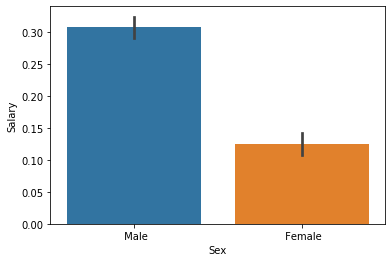

In [19]:
sns.barplot(x=X_train["Sex"][:5000], y=y_train[:5000])

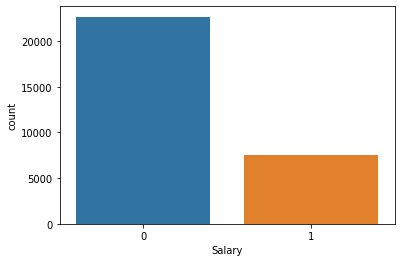

In [20]:
sns.countplot(x="Salary", data=df)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


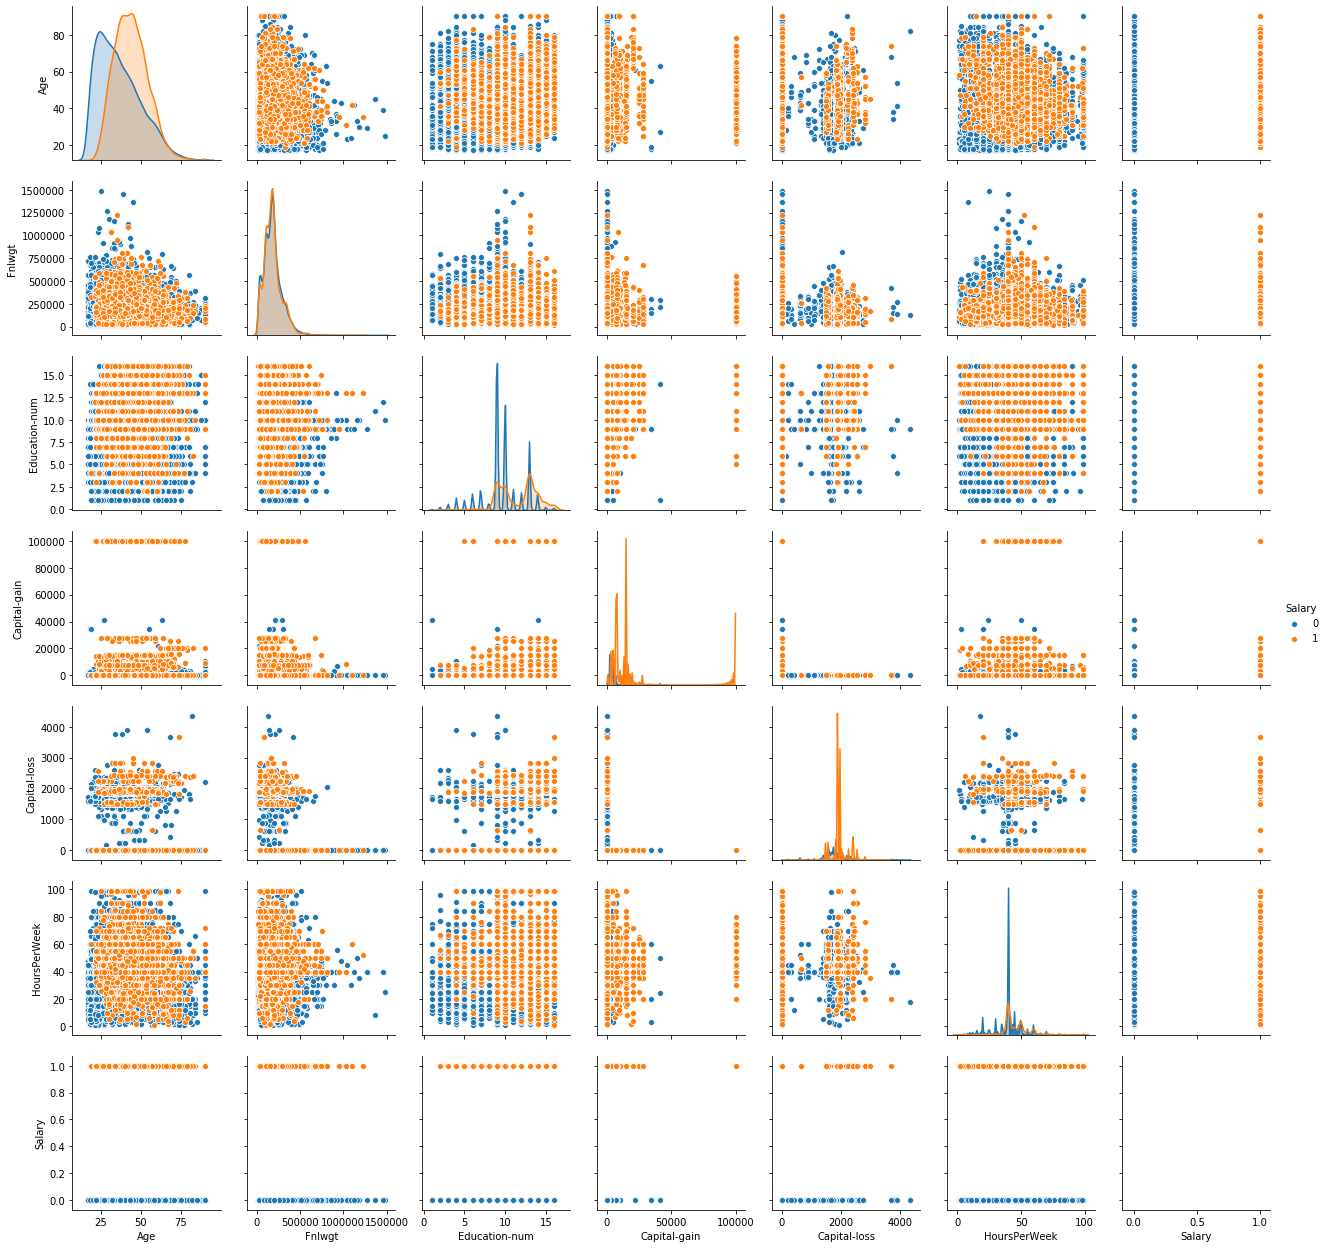

In [21]:
sns.pairplot(df, hue="Salary")

#### we can see on that histogram that being a male there is more chance of making >50K according to the data

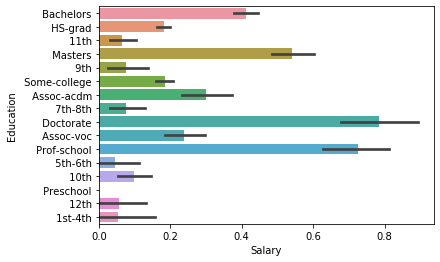

In [22]:
sns.barplot(x=y_train[:5000], y=X_train["Education"][:5000])

#### This barplot suggests that the more a person is eduation the more chance he has to make >50K

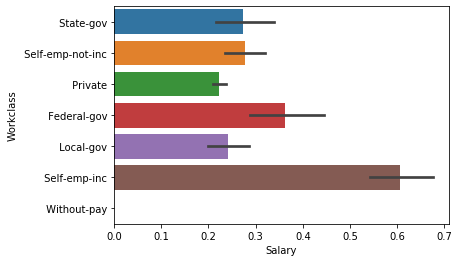

In [23]:
sns.barplot(x=y_train[:5000], y=X_train["Workclass"][:5000])

In [24]:
X_train.corr()

Age    Fnlwgt  Education-num  HoursPerWeek
Age            1.000000 -0.076477       0.043510      0.101594
Fnlwgt        -0.076477  1.000000      -0.045004     -0.022888
Education-num  0.043510 -0.045004       1.000000      0.152523
HoursPerWeek   0.101594 -0.022888       0.152523      1.000000

In [25]:
numPositives, numNegatives = y_train.value_counts()
numPositives / numNegatives

3.0169130376881075

In [26]:
X_train_clean.head(2)

Age  Education-num  Education_ 10th  Education_ 11th  Education_ 12th  \
0  0.301370            0.8                0                0                0   
1  0.452055            0.8                0                0                0   

   Education_ 1st-4th  Education_ 5th-6th  Education_ 7th-8th  Education_ 9th  \
0                   0                   0                   0               0   
1                   0                   0                   0               0   

   Education_ Assoc-acdm  ...  Sex_ Female  Sex_ Male  Workclass_ Federal-gov  \
0                      0  ...            0          1                       0   
1                      0  ...            0          1                       0   

   Workclass_ Local-gov  Workclass_ Never-Worked  Workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   

   Workclass_ Self-emp-inc  Workclass_ Self-emp-not-inc  Workclass_ State-gov  \
0                        0                            0                     1   
1                        0                            1                     0   

   Workclass_ Without-pay  
0                       0  
1                       0  

[2 rows x 103 columns]

## Training model + testing

##### Preparing data for training and testing by adding a column of 1's and transforming to numpy array

In [27]:
X_train_clean = np.hstack((np.ones((X_train_clean.shape[0], 1)), X_train_clean))
X_test_clean = np.hstack((np.ones((X_test_clean.shape[0], 1)), X_test_clean))

### Running K-Fold-Validation

In [29]:
import k_fold_validation_V2 as k2

In [30]:
k2.k_fold_validation(X_train_clean, y_train, 10, 200, 0)

0.7510523464886537

0.7510523464886537


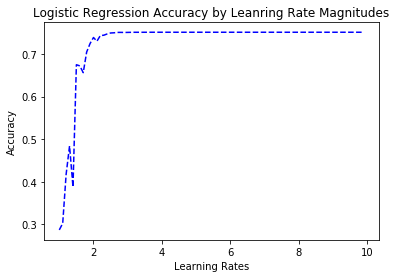

In [31]:
learn_vals = []
accuracies = []
max_acc = 0
for x in np.arange(1, 10, 0.1):
    acc = k2.k_fold_validation(X_train_clean, y_train, x, 200, 0)
    learn_vals.append(x)
    accuracies.append(acc)
    if(acc > max_acc):
        max_acc = acc
print(max_acc)
plt.plot(learn_vals,accuracies,'b--')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by Leanring Rate Magnitudes')
plt.show()
    

In [33]:
import k_fold_validation_V3 as k3

In [34]:
print(k3.k_fold_validation(X_train_clean, y_train, 4, 10000, 0))

(0.7959088573851774, 0.7510523464886537)


In [36]:
num_itt = []
accuracies = []
max_acc = 0
max_itt = 0
for x in np.arange(500, 10000, 500):
    acc, temp = k3.k_fold_validation(X_train_clean, y_train, 4, x, 0)
    num_itt.append(x)
    accuracies.append(acc)
    if(acc > max_acc):
        max_acc = acc
        max_itt = x
print(max_acc, max_itt)
plt.plot(num_itt,accuracies,'b--')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by Number of Iterations')
plt.show()

KeyboardInterrupt: 

In [ ]:
k_val = []
accuracies_nb = []
accuracies_l = []
max_acc_nb = 0
max_k_nb = 0
max_acc_l = 0
max_k_l = 0
for x in np.arange(2, 20, 1):
    acc_l, acc_nb = k3.k_fold_validation(X_train_clean, y_train, 4, 1500, 0, x)
    k_val.append(x)
    accuracies_l.append(acc_l)
    accuracies_nb.append(acc_nb)
    if(acc_l > max_acc_l):
        max_acc_l = acc_l
        max_k_l = x
    if(acc_nb > max_acc_nb):
        max_acc_nb = acc_nb
        max_k_nb = x
print(max_acc_l, max_k_l, max_acc_nb, max_k_nb)
plt.plot(k_val,accuracies_l,'b--')
plt.plot(k_val,accuracies_nb,'bs')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Model Accuracies by K Values')
plt.legend(['Logistic', 'Naive Bayes'])
plt.show()